## <span style="color:#2F749F;"><strong>📦 Sesión práctica 4: Introducción a datos atípicos</strong></span>
---


## <span style="color:#1a73e8;"><strong>Datos del estudiante</strong></span>

Thomas Girault

Nataly Rodriguez Atehortua

# <span style="color:#2F749F;"><strong>Ejercicio 1: Intervalo IQR</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


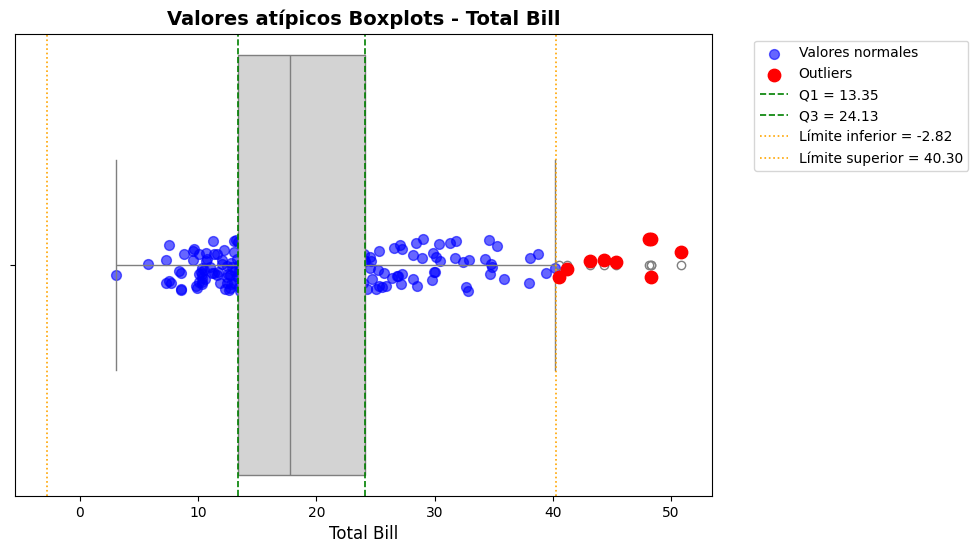

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")
display(tips.head(10))

total_bill = tips["total_bill"].values
Q1, Q3 = np.percentile(total_bill, [25, 75])
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
data_a = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]
data_b = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]

normales_iqr = total_bill[(total_bill >= lim_inf) & (total_bill <= lim_sup)]
outliers_iqr = total_bill[(total_bill < lim_inf) | (total_bill > lim_sup)]

plt.figure(figsize=(9,6))
sns.boxplot(x=total_bill, color="lightgray")
plt.title('Valores atípicos Boxplots - Total Bill', fontsize=14, weight="bold")
plt.xlabel('Total Bill', fontsize=12)

plt.scatter(normales_iqr, np.random.uniform(-0.05, 0.05, size=len(normales_iqr)),
            color="blue", s=50, alpha=0.6, label="Valores normales")

plt.scatter(outliers_iqr, np.random.uniform(-0.05, 0.05, size=len(outliers_iqr)),
            color="red", s=80, zorder=5, label="Outliers")

plt.axvline(Q1, color="green", linestyle="--", linewidth=1.2, label=f"Q1 = {Q1:.2f}")
plt.axvline(Q3, color="green", linestyle="--", linewidth=1.2, label=f"Q3 = {Q3:.2f}")
plt.axvline(lim_inf, color="orange", linestyle=":", linewidth=1.2, label=f"Límite inferior = {lim_inf:.2f}")
plt.axvline(lim_sup, color="orange", linestyle=":", linewidth=1.2, label=f"Límite superior = {lim_sup:.2f}")

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()



### ***Análisis***

En la gráfica se observan, resaltados en rojo, valores atípicos en el limite superior de la variable Total Bill. Estos corresponden a registros que superan el umbral definido por el método del rango intercuartílico (IQR), es decir, valores mayores que el tercer cuartil (Q3) más 1.5 veces el IQR. En este caso, dichos outliers exceden el valor de 40.3.

# <span style="color:#2F749F;"><strong>Ejercicio 2: Graficos de dispersión</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

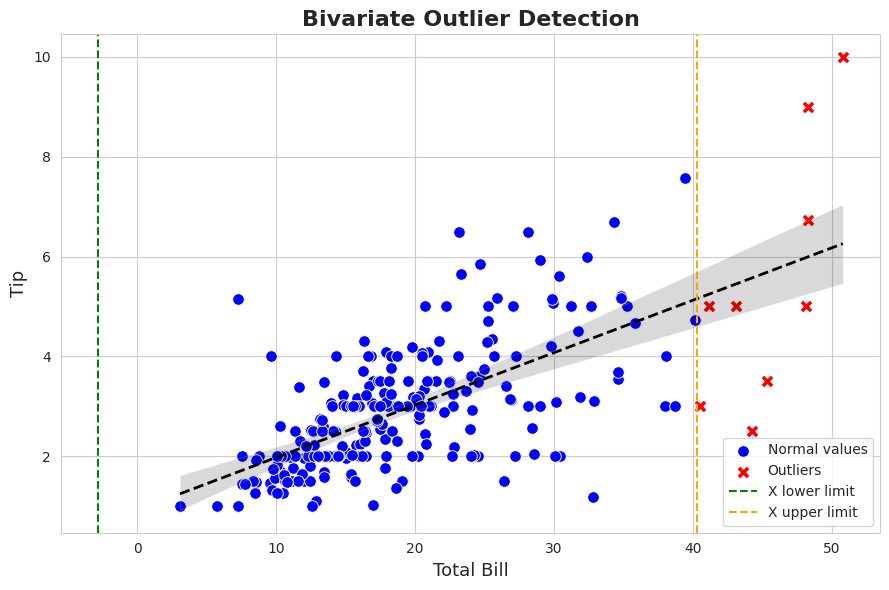

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Dataset
tips = sns.load_dataset("tips")
x = tips["total_bill"].values
y = tips["tip"].values

# Función para límites con IQR
def outlier_limits(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    return q1 - 1.5*iqr, q3 + 1.5*iqr

# Límites, selecciónar solo una variable
lim_x_inf, lim_x_sup = outlier_limits(x)

# Outliers en total bill
outliers = (x < lim_x_inf) | (x > lim_x_sup)

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
plt.title("Bivariate Outlier Detection", fontsize=16, weight="bold")

# Normales
sns.scatterplot(x=x[~outliers], y=y[~outliers], s=70, color="blue", label="Normal values")

# Outliers
sns.scatterplot(x=x[outliers], y=y[outliers], s=90, color="red", marker="X", label="Outliers")

sns.regplot(x=x, y=y, scatter=False, color="black",
            line_kws={"linestyle":"--", "linewidth":2, "label":"Trend line"})

# Límites de referencia
plt.axvline(lim_x_inf, linestyle='--', color='green', label='X lower limit')
plt.axvline(lim_x_sup, linestyle='--', color='orange', label='X upper limit')

plt.xlabel("Total Bill", fontsize=13)
plt.ylabel("Tip", fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()


### ***Análisis***

En la relación entre el valor de la cuenta (Total Bill) y la propina (Tip), los puntos en azul corresponden a observaciones que se encuentran dentro del rango esperado de Total Bill, mientras que los puntos en rojo representan valores atípicos determinados a partir de esta variable, identificados al exceder el límite superior definido mediante el rango intercuartílico (IQR).Estos casos reflejan consumos inusualmente altos respecto a la mayoría de registros

# <span style="color:#2F749F;"><strong>Ejercicio 3: Histogramas y funciones de densidad</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

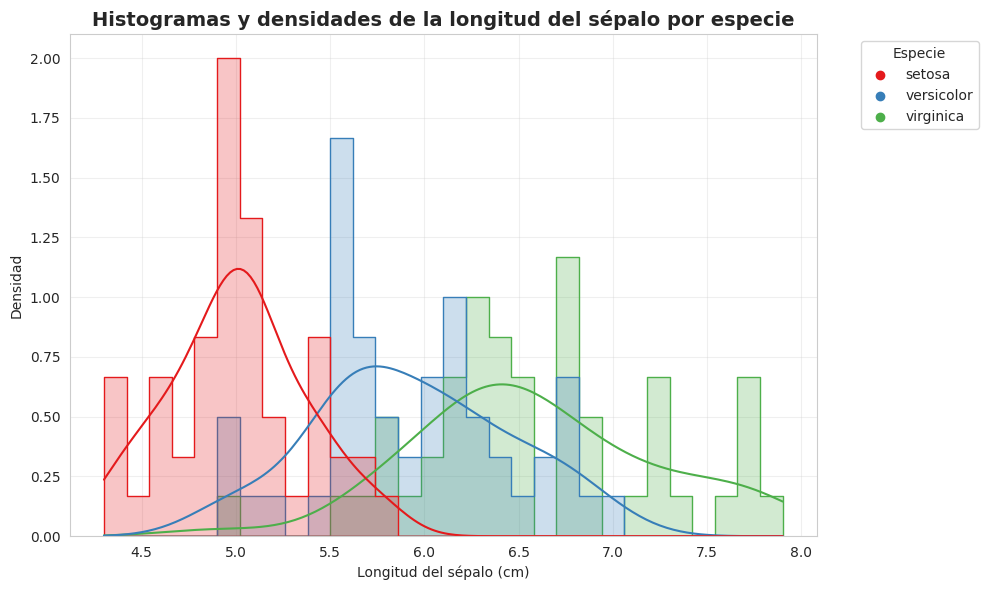

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

iris = sns.load_dataset("iris")
x = iris["sepal_length"].values
species = iris["species"].unique()
palette = dict(zip(species, sns.color_palette("Set1", n_colors=len(species))))

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=iris,
    x="sepal_length",
    hue="species",
    kde=True,
    bins=30,
    element="step",
    stat="density",
    common_norm=False,
    palette=palette,
    legend=False
)

plt.title("Histogramas y densidades de la longitud del sépalo por especie", fontsize=14, weight="bold")
plt.xlabel("Longitud del sépalo (cm)")
plt.ylabel("Densidad")

for sp in species:
    ax.scatter([], [], color=palette[sp], label=sp)
ax.legend(title="Especie", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### ***Análisis***

Con un número de bins de 30, se observa que la especie setosa (rojo) presenta una distribución relativamente concentrada entre 4.5 y 5.5 cm, sin evidencias claras de valores atípicos.

Por el contrario, las especies versicolor (azul) y virginica (verde) muestran distribuciones más extendidas, con colas más largas hacia valores extremos. En particular, se aprecian observaciones aisladas que se separan de la mayor concentración de datos, lo que sugiere la posible presencia de valores atípicos en estas especies.

# <span style="color:#2F749F;"><strong>Ejercicio 4: Z-Score</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

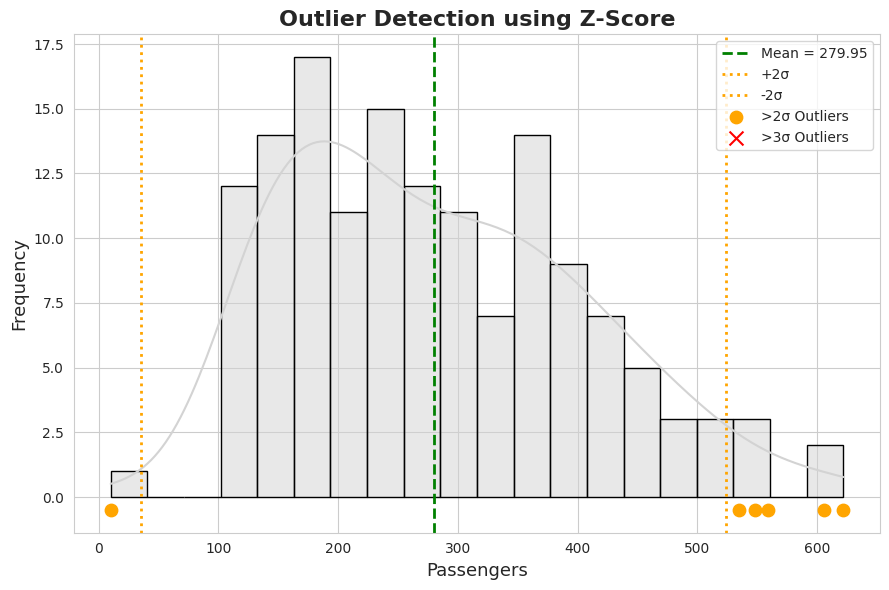

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Dataset
flights = sns.load_dataset("flights")
x = flights["passengers"].values

# Agrego dos outliers artificiales
x = np.append(x, [10, 500])

# Cálculo de z-scores
z_scores = zscore(x)
outliers_soft = np.abs(z_scores) > 2
outliers_strong = np.abs(z_scores) > 3

mean_x = np.mean(x)
std_x = np.std(x)

# Plot
plt.figure(figsize=(9,6))
sns.histplot(x=x, bins=20, kde=True, color="lightgray", edgecolor="black")

# Media y ±2σ
plt.axvline(mean_x, color="green", linestyle="--", linewidth=2, label=f"Mean = {mean_x:.2f}")
plt.axvline(mean_x + 2*std_x, color="orange", linestyle=":", linewidth=2, label="+2σ")
plt.axvline(mean_x - 2*std_x, color="orange", linestyle=":", linewidth=2, label="-2σ")

# Outliers (>2σ, strong >3σ)
plt.scatter(x[outliers_soft], np.zeros_like(x[outliers_soft])-0.5,
            color="orange", s=80, marker="o", label=">2σ Outliers")
plt.scatter(x[outliers_strong], np.zeros_like(x[outliers_strong])-1,
            color="red", s=100, marker="x", label=">3σ Outliers")

# Títulos y etiquetas
plt.title("Outlier Detection using Z-Score", fontsize=16, weight="bold")
plt.xlabel("Passengers", fontsize=13)
plt.ylabel("Frequency", fontsize=13)

handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
plt.legend(unique.values(), unique.keys())

plt.tight_layout()
plt.show()


### ***Análisis***

Al analizar la variable pasajeros mediante el criterio de z-score, se observa la presencia de posibles valores atípicos cuando se emplea un umbral de |z| > 2. En particular, destaca un valor cercano a 10 y los valores que superan los 500 pasajeros, los cuales se alejan más de dos desviaciones estándar respecto a la media del conjunto. Sin embargo, ninguno de estos valores alcanza a superar el umbral más estricto de |z| > 3

# <span style="color:#2F749F;"><strong>Ejercicio 5: K-means</strong></span>

A partir de siguiente código:

1. Ajusta el código para mejorar la interpretación de la gráfica. Mínimo debes:
   - Indicar los nombres de los ejes
   - Incluir legenda para comprender lo que esté incluído en la gráfica
2. Generar máximo 5 líneas de análisis sobre lo que observas en términos de defición de atípicos sobre tú gráfica final

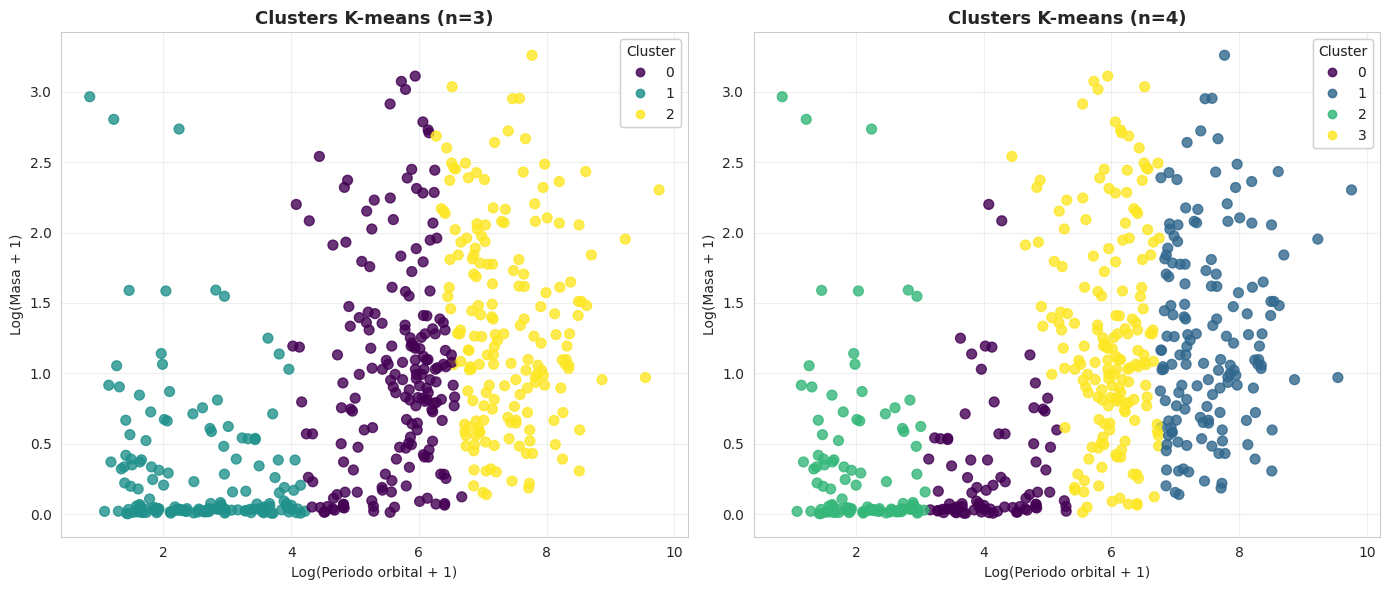

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

planets = sns.load_dataset("planets").dropna(subset=["orbital_period", "mass"])
X = planets[["orbital_period", "mass"]].values
X = np.log1p(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)
labels = kmeans.labels_

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Clusters con n=3 ----
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X)
labels_3 = kmeans_3.labels_

scatter1 = axes[0].scatter(X[:,0], X[:,1], c=labels_3, cmap="viridis", s=50, alpha=0.8)
axes[0].set_xlabel("Log(Periodo orbital + 1)")
axes[0].set_ylabel("Log(Masa + 1)")
axes[0].set_title("Clusters K-means (n=3)", fontsize=13, weight="bold")
legend1 = axes[0].legend(*scatter1.legend_elements(), title="Cluster", loc="upper right")
axes[0].add_artist(legend1)
axes[0].grid(alpha=0.3)

# ---- Clusters con n=4 ----
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10).fit(X)
labels_4 = kmeans_4.labels_

scatter2 = axes[1].scatter(X[:,0], X[:,1], c=labels_4, cmap="viridis", s=50, alpha=0.8)
axes[1].set_xlabel("Log(Periodo orbital + 1)")
axes[1].set_ylabel("Log(Masa + 1)")
axes[1].set_title("Clusters K-means (n=4)", fontsize=13, weight="bold")
legend2 = axes[1].legend(*scatter2.legend_elements(), title="Cluster", loc="upper right")
axes[1].add_artist(legend2)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### ***Análisis***

Con K-means (𝑛=3 y 𝑛=4), se observa que la mayoría de observaciones se agrupan de manera consistente. No obstante, en ambos escenarios aparece un grupo de 3 observaciones atípicas caracterizado por valores muy altos en la variable de masa (superiores a 2.5 en Log(Masa + 1)) y valores relativamente bajos en Log(Periodo orbital + 1). Estos tres casos se separan del resto de los datos: con 𝑛=3 se ubican en el cluster 1, mientras que con 𝑛=4 se concentran en el cluster 2.